# Instructions
<hr>

## 1. install YOLO v5

In [1]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...


## 2. install requirements.txt

In [9]:
!pip install -r ./yolov5/requirements.txt

                                              0.0/606.2 kB ? eta -:--:--
     ---------------------------           450.6/606.2 kB 14.2 MB/s eta 0:00:01
     -------------------------------------- 606.2/606.2 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.124
    Uninstalling ultralytics-8.0.124:
      Successfully uninstalled ultralytics-8.0.124


## 3. Using GPU calc

In [1]:
import torch
USE_CUDA = torch.cuda.is_available()
device = torch.device('cuda:0' if USE_CUDA else 'cpu')
print(torch.cuda.is_available())
print(device)
print(torch.cuda.get_device_name(0)) #-> get graphic card name

True
cuda:0
NVIDIA GeForce RTX 4080


In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

## 4. Data Preprocessing

In [3]:
import yaml

with open('keyboard.yaml', 'r') as f:
  data = yaml.full_load(f)

print(data)
data['train'] = 'C:/Users/User/Desktop/repo/Experimental/Hand_Landmark_Detection/YeongminKo/YOLOV5/C3Pap_openpose/keyboard/images/train/'
data['val'] = 'C:/Users/User/Desktop/repo/Experimental/Hand_Landmark_Detection/YeongminKo/YOLOV5/C3Pap_openpose/keyboard/images/val/'

with open('keyboard.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)

{'names': ['keyboard'], 'nc': 1, 'train': 'C:/Users/User/Desktop/repo/Experimental/Hand_Landmark_Detection/YeongminKo/YOLOV5/C3Pap_openpose/keyboard/images/train/', 'val': 'C:/Users/User/Desktop/repo/Experimental/Hand_Landmark_Detection/YeongminKo/YOLOV5/C3Pap_openpose/keyboard/images/val/'}
{'names': ['keyboard'], 'nc': 1, 'train': 'C:/Users/User/Desktop/repo/Experimental/Hand_Landmark_Detection/YeongminKo/YOLOV5/C3Pap_openpose/keyboard/images/train/', 'val': 'C:/Users/User/Desktop/repo/Experimental/Hand_Landmark_Detection/YeongminKo/YOLOV5/C3Pap_openpose/keyboard/images/val/'}


In [5]:
from glob import glob

image_paths = glob('keyboard/images/image/*.png')
print(len(image_paths))

# train_test_split
from sklearn.model_selection import train_test_split # train,validation split
train_paths, test_paths = train_test_split(image_paths, test_size=0.2, random_state=42)
train_paths, val_paths = train_test_split(train_paths, test_size=0.25, random_state=42)

# 결과 확인
print("훈련 데이터 개수:", len(train_paths))
print("검증 데이터 개수:", len(val_paths))
print("테스트 데이터 개수:", len(test_paths))

# 파일 옮기기
import shutil
import os

def move_files_to_destination(file_paths, destination_folder):
    for file_path in file_paths:
        filename = os.path.basename(file_path)
        destination_path = os.path.join(destination_folder, filename)
        shutil.move(file_path, destination_path)

# 이동할 폴더 경로 설정
train_destination = './keyboard/images/train'
val_destination = './keyboard/images/val'
test_destination = './keyboard/images/test'

# 훈련 데이터 이동
move_files_to_destination(train_paths, train_destination)
# 검증 데이터 이동
move_files_to_destination(val_paths, val_destination)
# 테스트 데이터 이동
move_files_to_destination(test_paths, test_destination)

print("파일 이동이 완료되었습니다.")

In [36]:
train_paths_cleaned = [path.replace('keyboard/images/image\\', '').replace('.png', '.txt') for path in train_paths]
val_paths_cleaned = [path.replace('keyboard/images/image\\', '').replace('.png', '.txt') for path in val_paths]
test_paths_cleaned = [path.replace('keyboard/images/image\\', '').replace('.png', '.txt') for path in test_paths]

# 결과 확인
print("훈련 데이터 개수:", len(train_paths_cleaned))
print("검증 데이터 개수:", len(val_paths_cleaned))
print("테스트 데이터 개수:", len(test_paths_cleaned))
#print(val_paths_cleaned)

label_paths = glob('keyboard/labels/label/*.txt')
print(len(label_paths))

훈련 데이터 개수: 1563
검증 데이터 개수: 521
테스트 데이터 개수: 521
2605


In [37]:
import shutil
import os

def move_files_with_matching_names(source_folder, destination_folder, file_list):
    # destination_folder가 존재하지 않으면 생성
    os.makedirs(destination_folder, exist_ok=True)

    for file_name in file_list:
        source_path = os.path.join(source_folder, file_name)
        destination_path = os.path.join(destination_folder, file_name)

        # 파일 이름이 일치하면 이동
        if os.path.exists(source_path):
            shutil.move(source_path, destination_path)

# 폴더 경로 설정
source = './keyboard/labels/label'
train_destination = './keyboard/labels/train'
val_destination = './keyboard/labels/val'
test_destination = './keyboard/labels/test'

# 훈련 데이터 이동
move_files_with_matching_names(source, train_destination, [os.path.basename(path) for path in label_paths if os.path.basename(path) in train_paths_cleaned])
# 검증 데이터 이동
move_files_with_matching_names(source, val_destination, [os.path.basename(path) for path in label_paths if os.path.basename(path) in val_paths_cleaned])
# 테스트 데이터 이동
move_files_with_matching_names(source, test_destination, [os.path.basename(path) for path in label_paths if os.path.basename(path) in test_paths_cleaned])

print("파일 이동이 완료되었습니다.")

파일 이동이 완료되었습니다.


# **5.Model Training**
* data : About data yaml file directory
* weights : Pre-Trained Model file directory (.pt), If you enter nothing model training with random weight value
* epochs : epoch 
* batch : batch_size
* cfg: example
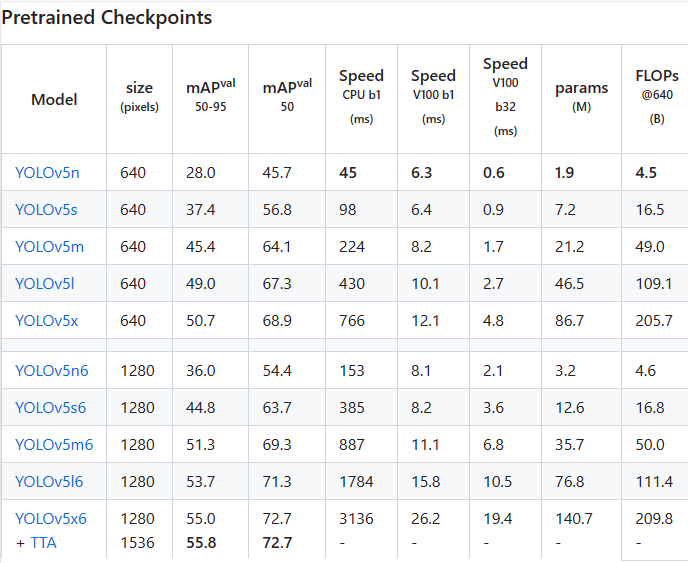

In [4]:
# epochs 100
!python ./yolov5/train.py --batch 16 --epochs 100 --data keyboard.yaml --cfg ./yolov5/models/yolov5s.yaml --weights yolov5s.pt --name piano_yolov5s_results --device 0

train: weights=yolov5s.pt, cfg=./yolov5/models/yolov5s.yaml, data=keyboard.yaml, hyp=yolov5\data\hyps\hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5\runs\train, name=piano_yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-203-g0897415 Python-3.10.11 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 4080, 16376MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou

In [15]:
# epochs 50
!python ./yolov5/train.py --batch 16 --epochs 50 --data keyboard.yaml --cfg ./yolov5/models/yolov5s.yaml --weights yolov5s.pt --name piano_yolov5s_results2 --device 0

train: weights=yolov5s.pt, cfg=./yolov5/models/yolov5s.yaml, data=keyboard.yaml, hyp=yolov5\data\hyps\hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5\runs\train, name=piano_yolov5s_results2, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-203-g0897415 Python-3.10.11 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 4080, 16376MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou

In [17]:
# epochs 500
!python ./yolov5/train.py --batch 16 --epochs 500 --data keyboard.yaml --cfg ./yolov5/models/yolov5s.yaml --weights yolov5s.pt --name piano_yolov5s_results3 --device 0

train: weights=yolov5s.pt, cfg=./yolov5/models/yolov5s.yaml, data=keyboard.yaml, hyp=yolov5\data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5\runs\train, name=piano_yolov5s_results2, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-203-g0897415 Python-3.10.11 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 4080, 16376MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, io

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



The trained model is saved in the directory specified by --name in the format ./yolov5/runs/. In this exercise, it is saved in the directory ./yolov5/runs/train/piano_yolov5s_results/. You can visualize the training results by accessing the results.png file in that path.

### Viewing training results with TensorBoard

In [12]:
%load_ext tensorboard
%tensorboard --logdir ./yolov5/runs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 2920), started 0:02:06 ago. (Use '!kill 2920' to kill it.)

# 6. **Model Validation**

The trained model weights are saved in /content/yolov5/runs/train/piano_yolov5s_results/weights/best.pt, and they are used to validate the model.

In [14]:
!python ./yolov5/val.py --data ./keyboard.yaml --weights ./yolov5/runs/train/piano_yolov5s_results/weights/best.pt

val: data=./keyboard.yaml, weights=['./yolov5/runs/train/piano_yolov5s_results/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5\runs\val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5  v7.0-203-g0897415 Python-3.10.11 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 4080, 16376MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs

val: Scanning C:\Users\User\Desktop\repo\Experimental\Hand_Landmark_Detection\YeongminKo\YOLOV5\C3Pap_openpose\keyboard\labels\val...:   0%|          | 0/521 [00:00<?, ?it/s]
val: Scanning C:\Users\User\Desktop\repo\Experimental\Hand_Landmark_Detection\YeongminKo\YOLOV5\C3Pap_openpose\keyboard\labels\val... 1 images, 0 backgrounds, 0 corrupt:   0%|          | 1/521 [00:03<33:51,  3.91s/it]
val: Scanning C:\Users\User

In [16]:
!python ./yolov5/val.py --data ./keyboard.yaml --weights ./yolov5/runs/train/piano_yolov5s_results2/weights/best.pt

val: data=./keyboard.yaml, weights=['./yolov5/runs/train/piano_yolov5s_results2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5\runs\val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5  v7.0-203-g0897415 Python-3.10.11 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 4080, 16376MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs

val: Scanning C:\Users\User\Desktop\repo\Experimental\Hand_Landmark_Detection\YeongminKo\YOLOV5\C3Pap_openpose\keyboard\labels\val...:   0%|          | 0/521 [00:00<?, ?it/s]
val: Scanning C:\Users\User\Desktop\repo\Experimental\Hand_Landmark_Detection\YeongminKo\YOLOV5\C3Pap_openpose\keyboard\labels\val... 1 images, 0 backgrounds, 0 corrupt:   0%|          | 1/521 [00:03<34:25,  3.97s/it]
val: Scanning C:\Users\Use

In [18]:
!python ./yolov5/val.py --data ./keyboard.yaml --weights ./yolov5/runs/train/piano_yolov5s_results3/weights/best.pt

val: data=./keyboard.yaml, weights=['./yolov5/runs/train/piano_yolov5s_results3/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5\runs\val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5  v7.0-203-g0897415 Python-3.10.11 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 4080, 16376MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs

val: Scanning C:\Users\User\Desktop\repo\Experimental\Hand_Landmark_Detection\YeongminKo\YOLOV5\C3Pap_openpose\keyboard\labels\val...:   0%|          | 0/521 [00:00<?, ?it/s]
val: Scanning C:\Users\User\Desktop\repo\Experimental\Hand_Landmark_Detection\YeongminKo\YOLOV5\C3Pap_openpose\keyboard\labels\val... 1 images, 0 backgrounds, 0 corrupt:   0%|          | 1/521 [00:03<33:30,  3.87s/it]
val: Scanning C:\Users\Use

The validation results are saved in /runs/val/exp/.

# 7. **Inference**
* source : Test Image (or Folder) Directory
* weights : The path to the weight file (in .pt format) after training is complete.
* conf : conf_threshold value (0 ~ 1)


To draw bounding boxes, the class score should exceed the specified value. The results are saved in the runs/detect/exp directory. If you repeat the predictions, folders such as exp1, exp2, exp3, etc., will be created in the runs/detect directory, and the results will be recorded in those folders.

In [20]:
!python ./yolov5/detect.py --weights ./yolov5/runs/train/piano_yolov5s_results/weights/best.pt --source "C:/Users/User/Desktop/repo/Experimental/Hand_Landmark_Detection/YeongminKo/YOLOV5/C3Pap_openpose/keyboard/images/test/*.*"
#--save-txt

detect: weights=['./yolov5/runs/train/piano_yolov5s_results/weights/best.pt'], source=C:/Users/User/Desktop/repo/Experimental/Hand_Landmark_Detection/YeongminKo/YOLOV5/C3Pap_openpose/keyboard/images/test/*.*, data=yolov5\data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-203-g0897415 Python-3.10.11 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 4080, 16376MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/521 C:\Users\User\Desktop\repo\Experimental\Hand_Landmark_Detection\YeongminKo\YOLOV5\C3Pap_openpose\keyboard\images\test\0_output_staccato_amateur_chopin_etudeop10no4_amateur_staccato_

In [ ]:
#Image(os.path.join('./yolov5/runs/detect/exp2/', os.path.basename(val_img_path)))